In [15]:
#Author Jeffrey Tang
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
#Data Preprocessing
df = pd.read_csv('stack overflow data.csv')
df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
...,...,...,...,...,...,...
59995,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
59996,60468018,How can I make a c# application outside of vis...,<p>I'm very new to programming and I'm teachin...,<c#><visual-studio>,2020-02-29 17:55:56,LQ_CLOSE
59997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
59998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [18]:
#df['Category']=pd.get_dummies(df['Y'])
df2 = pd.get_dummies(df['Y'])
df2
df['Y'] = df['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})

<AxesSubplot:xlabel='HQ', ylabel='count'>

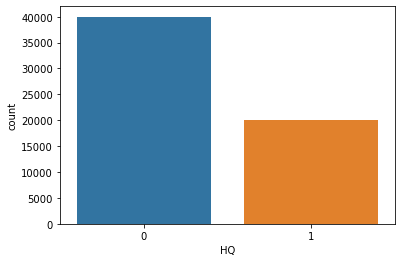

In [19]:
sns.countplot(x='HQ',data=df2)

In [20]:
df0 = df.drop(['Id', 'Title', 'Tags', 'CreationDate'], axis = 1)

df0

,Body,Y
0,<p>I'm already familiar with repeating tasks e...,0
1,I am having 4 different tables like \r\nselect...,1
2,<p>I'd like to understand why Java 8 Optionals...,2
3,<p>I am attempting to overlay a title over an ...,2
4,"<p>The question is very simple, but I just cou...",2
...,...,...
59995,<p>I try to multiply an integer by a double bu...,0
59996,<p>I'm very new to programming and I'm teachin...,0
59997,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,1
59998,<p>I have a controller inside which a server i...,0


In [21]:
#Text Processing Step
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords

In [22]:
def text_processing(message):
    
    Stopwords = stopwords.words('english')
    
    no_punctuation = [char for char in message if char not in string.punctuation]

    no_punctuation = ''.join(no_punctuation)
    
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in Stopwords])

df0['text'] = df['Body'].apply(text_processing)

df0.head()

,Body,Y,text
0,<p>I'm already familiar with repeating tasks e...,0,pIm already familiar repeating tasks every n s...
1,I am having 4 different tables like \r\nselect...,1,4 different tables like select System select S...
2,<p>I'd like to understand why Java 8 Optionals...,2,pId like understand Java 8 Optionals designed ...
3,<p>I am attempting to overlay a title over an ...,2,pI attempting overlay title image image darken...
4,"<p>The question is very simple, but I just cou...",2,pThe question simple could find answerp pWhy d...


In [23]:
from sklearn.model_selection import train_test_split
X=df0['text'].values
y=df0['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
X_train

array(['phow capitalize last letter String method String Class thisp pIm practicing exercise asked methodp',
       'enter image description here1 1 httpsistackimgurcomh96rtpng open project pc gives error try open another pc opens well',
       'pI trying zip single file python whatever reason Im hard time getting syntax trying keep original file create new zipped file original like Mac Windows would archive filep pHere farp precodeimport zipfile myfilepath tmps selffilename myzippath myfilepathreplacexml zip zipfileZipFilemyzippath wwriteopenmyfilepathread zip file properly codepre',
       ...,
       'pFirst issue installing nodeinspector revert installing version code075code installed globally machine try run codenodeinspectorcode get error find odd havent able find much regards two errorsp precodemodulejs487 throw err Error Cannot find module debugger FunctionModuleresolveFilename modulejs48515 FunctionModuleload modulejs43725 Modulerequire modulejs51317 require internalmodulejs11

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(units=8270,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train,epochs=40,validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: inputs=  (0, 266078)	0.30403882765415724
  (0, 55033)	0.2892073202246858
  (0, 155159)	0.3473049162560539
  (0, 320929)	0.3950555192807951
  (0, 314213)	0.16098526341437588
  (0, 422001)	0.17411368122870247
  (0, 80619)	0.14916776530767248
  (0, 265948)	0.1762271827878965
  (0, 397621)	0.29237445321724487
  (0, 241276)	0.28855881086466256
  (0, 238947)	0.2109711071162063
  (0, 73580)	0.4399854131495738
  (0, 313486)	0.1756305719557352
  (1, 453035)	0.19099470526013215
  (1, 295908)	0.27022516363035365
  (1, 47962)	0.1640703690757453
  (1, 431327)	0.14808039452970273
  (1, 151948)	0.11727544678044514
  (1, 178276)	0.1988840828173735
  (1, 308821)	0.5404503272607073
  (1, 336016)	0.1597295194367825
  (1, 295405)	0.3749588085591064
  (1, 204222)	0.4525235025298177
  (1, 186230)	0.223024895220179
  (1, 133091)	0.15878539409633904
  :	:
  (47999, 62398)	0.17377524815038278
  (47999, 75085)	0.13883966174226955
  (47999, 436327)	0.3702331617169546
  (47999, 411557)	0.1329535663802444
  (47999, 368999)	0.1512218919820578
  (47999, 78238)	0.16102862225559744
  (47999, 308802)	0.09447510732377823
  (47999, 40056)	0.10815409525469127
  (47999, 49161)	0.08585091113199764
  (47999, 186314)	0.10756457826026326
  (47999, 353361)	0.11022617968409072
  (47999, 303836)	0.09169186666219666
  (47999, 32046)	0.09498263335202556
  (47999, 456857)	0.17125272625084262
  (47999, 106709)	0.1390981212559439
  (47999, 109818)	0.14555747120149218
  (47999, 244472)	0.2772953082203578
  (47999, 376293)	0.08532355732250288
  (47999, 218270)	0.10462174947292904
  (47999, 346989)	0.099032231989685
  (47999, 160041)	0.07330741317429201
  (47999, 431376)	0.06919365824975139
  (47999, 313752)	0.04584154808496584
  (47999, 133091)	0.09199133418107501
  (47999, 216362)	0.08369597001881322